In [93]:
from geometry import *

from shapely.ops import nearest_points
from sklearn.neighbors import NearestNeighbors
from scipy.ndimage import uniform_filter1d
import numpy as np

### MRE Data: County and Place Data
Place boundaries represent locally dense urban areas. Boundaries will be used initally as a proxy for regional parcel density where adaptive eps will be calcualted. 

In [71]:
county1 = mPolygon(origin=(0,0), size=(25,25), alpha=0)

In [72]:
place1 = mPolygon(origin=(0, 0), size=(10, 10))
place2 = mPolygon(origin=(0, 12), size=(10, 10))
place3 = mPolygon(origin=(14, 5), size=(10, 10))
places = [place1, place2, place3]

place_data = {
    'Place': ['P1', 'P2', 'P3']
}
place_gdf = GeoDataFrame(place_data, places).build()
place_gdf

,Place,geometry
0,P1,"POLYGON ((0.00000 0.00000, 10.00000 0.00000, 1..."
1,P2,"POLYGON ((0.00000 12.00000, 10.00000 12.00000,..."
2,P3,"POLYGON ((14.00000 5.00000, 24.00000 5.00000, ..."


In [73]:
map = Map()

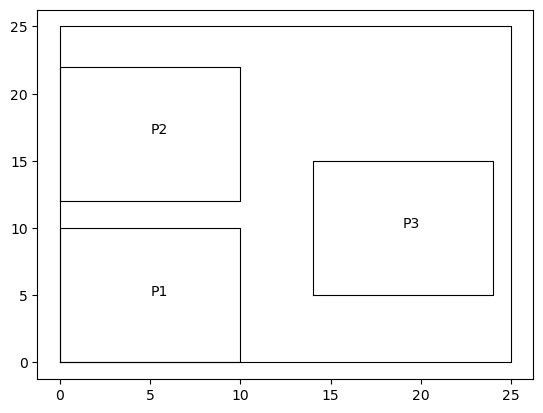

In [74]:
map.add_gdf(place_gdf, label='Place', alpha=0)
map.add_shape(county1)
map.plot()

### Places 1 Parcel Data

In [75]:
p1_1 = mPolygon(origin=(0, 0), size=(2,2))
p1_2 = mPolygon(origin=(0,2), size=(2,2))
p1_3 = mPolygon(origin=(0,4), size=(2,2))
p1_4 = mPolygon(origin=(0,6), size=(2,2))
p1_5 = mPolygon(origin=(0,8), size=(2,2))
p1_6 = mPolygon(origin=(2,0), size=(2,2))
p1_7 = mPolygon(origin=(2,2), size=(2,2))
p1_8 = mPolygon(origin=(2,4), size=(2,2))
p1_9 = mPolygon(origin=(2,6), size=(2,2))
p1_10 = mPolygon(origin=(2,8), size=(2,2))

p1_11 = mPolygon(origin=(6,0), size=(2,2))
p1_12 = mPolygon(origin=(6,2), size=(2,2))
p1_13 = mPolygon(origin=(6,4), size=(2,2))
p1_14 = mPolygon(origin=(6,6), size=(2,2))
p1_15 = mPolygon(origin=(6,8), size=(2,2))
p1_16 = mPolygon(origin=(8,0), size=(2,2))
p1_17 = mPolygon(origin=(8,2), size=(2,2))
p1_18 = mPolygon(origin=(8,4), size=(2,2))
p1_19 = mPolygon(origin=(8,6), size=(2,2))
p1_20 = mPolygon(origin=(8,8), size=(2,2))

p1_parcels = [p1_1, p1_2, p1_3, p1_4, p1_5, p1_6, p1_7, p1_8, p1_9, p1_10, p1_11, p1_12, p1_13, p1_14, p1_15, p1_16, p1_17, p1_18, p1_19, p1_20]

p1_parcel_data = {
    'OWNER': ['D', 'D', 'F', 'E', 'E', 'A', 'D', 'E', 'E', 'E', 'A', 'D', 'D', 'C', 'F', 'B', 'B', 'C', 'F', 'F']
}
p1_parcel_gdf = GeoDataFrame(p1_parcel_data, p1_parcels).build()

# add line to map
p1_line = mLine(coords=[(5, 0), (5, 10)], color='black')



In [76]:
map.add_gdf(p1_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p1_line)

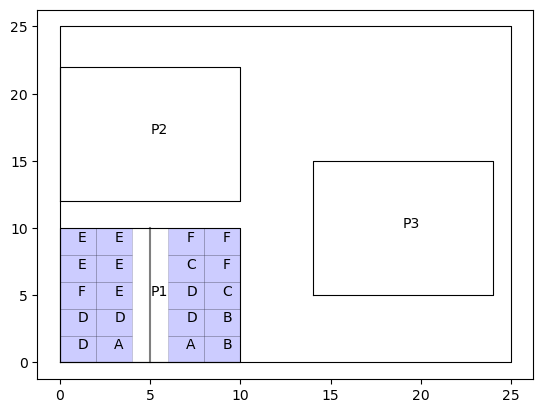

In [77]:
map.plot()

### Places 2 Parcel Data

In [79]:
p2_1 = mPolygon(origin=(0, 12), size=(2,2))
p2_2 = mPolygon(origin=(0,14), size=(2,2))
p2_3 = mPolygon(origin=(0,16), size=(2,2))
p2_4 = mPolygon(origin=(0,18), size=(2,2))
p2_5 = mPolygon(origin=(0,20), size=(2,2))
p2_6 = mPolygon(origin=(2,12), size=(2,2))
p2_7 = mPolygon(origin=(2,14), size=(2,2))
p2_8 = mPolygon(origin=(2,16), size=(2,2))
p2_9 = mPolygon(origin=(2,18), size=(2,2))
p2_10 = mPolygon(origin=(2,20), size=(2,2))

p2_11 = mPolygon(origin=(6,12), size=(2,2))
p2_12 = mPolygon(origin=(6,14), size=(2,2))
p2_13 = mPolygon(origin=(6,16), size=(2,2))
p2_14 = mPolygon(origin=(6,18), size=(2,2))
p2_15 = mPolygon(origin=(6,20), size=(2,2))
p2_16 = mPolygon(origin=(8,12), size=(2,2))
p2_17 = mPolygon(origin=(8,14), size=(2,2))
p2_18 = mPolygon(origin=(8,16), size=(2,2))
p2_19 = mPolygon(origin=(8,18), size=(2,2))
p2_20 = mPolygon(origin=(8,20), size=(2,2))


p2_parcels = [p2_1, p2_2, p2_3, p2_4, p2_5, p2_6, p2_7, p2_8, p2_9, p2_10, p2_11, p2_12, p2_13, p2_14, p2_15, p2_16, p2_17, p2_18, p2_19, p2_20]

p2_parcel_data = {
    'OWNER': ['E', 'C', 'C', 'C', 'E', 'E', 'B', 'F', 'A', 'D', 'F', 'F', 'C', 'C', 'C', 'F', 'G', 'H', 'I', 'J']
}
p2_parcel_gdf = GeoDataFrame(p2_parcel_data, p2_parcels).build()

# add line to map
p2_line = mLine(coords=[(5, 12), (5, 22)], color='black')


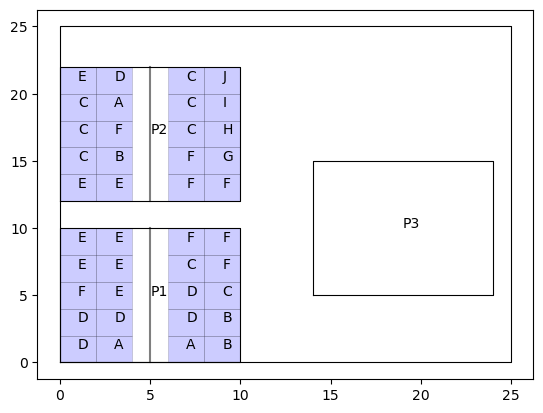

In [80]:
map.add_gdf(p2_parcel_gdf, label='OWNER', alpha=0.2, color='blue')
map.add_shape(p2_line)
map.plot()

### Clustering Workflow

In [81]:
def polygon_distance(polygon1, polygon2):
    # Calculate the minimum distance between two polygons
    point1, point2 = nearest_points(polygon1, polygon2)
    return point1.distance(point2)

def compute_distance_matrix(polygons):
    # Create a distance matrix between all polygons
    num_polygons = len(polygons)
    distance_matrix = np.zeros((num_polygons, num_polygons))
    
    for i in range(num_polygons):
        for j in range(i + 1, num_polygons):
            distance_matrix[i, j] = polygon_distance(polygons[i], polygons[j])
            distance_matrix[j, i] = distance_matrix[i, j]  # Symmetry
    
    return distance_matrix

In [83]:
parcels = pd.concat([p1_parcel_gdf, p2_parcel_gdf], ignore_index=True)

display(parcels.head(3))

,OWNER,geometry
0,D,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2...."
1,D,"POLYGON ((0.00000 2.00000, 2.00000 2.00000, 2...."
2,F,"POLYGON ((0.00000 4.00000, 2.00000 4.00000, 2...."


In [ ]:
sample_size = 3
for place_id, place_data in place_gdf.iterrows():
    print(f"Processing place {place_id}")
    sub_parcels = parcels[parcels.within(place_data['geometry'])]
    unique_owners = sub_parcels['OWNER'].unique()
    print(f"Unique owners: {unique_owners}")

    for owner in unique_owners:
        owner_parcels = sub_parcels[sub_parcels['OWNER'] == owner]
        print(f"Owner {owner} has {len(owner_parcels)} parcels")
        polygons = owner_parcels['geometry'].to_list()
        distance_matrix = compute_distance_matrix(polygons)
        # Assuming distance_matrix is the precomputed distance matrix
        neighbors = NearestNeighbors(n_neighbors=sample_size, metric='precomputed')
        neighbors_fit = neighbors.fit(distance_matrix)

        distances, indices = neighbors_fit.kneighbors(distance_matrix)

        # Sort distances to the k-th nearest neighbor
        sorted_distances = np.sort(distances[:, sample_size-1])
        smooth_dist = uniform_filter1d(sorted_distances, size=10)
        difference = np.diff(smooth_dist)
        elbow_index = np.argmax(difference) + 1
        optimal_distance = smooth_dist[elbow_index]

        dbscan = DBSCAN(eps=optimal_distance, min_samples=sample_size, metric='precomputed')
        clusters = dbscan.fit_predict(distance_matrix)

        break

    

    break

Processing place 0
Unique owners: ['D' 'F' 'E' 'A' 'C' 'B']
Owner D has 5 parcels


In [96]:
optimal_distance

0.8